In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.model_selection import train_test_split
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('training.csv')
data = data.drop('Unnamed: 0', axis=1)

data = data.fillna(data.mean())

# Separating train and test samples by 30 for the testing 
X = data [['RevolvingUtilizationOfUnsecuredLines', 'age',
          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfDependents']]
y = data [['SeriousDlqin2yrs']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=49)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


logreg_model = LogisticRegression().fit(X_train,y_train)
logreg_prediction = logreg_model.predict_proba(X_test)



rf_model = RandomForestClassifier(random_state=1234).fit(X_train, y_train)
rf_prediction = rf_model.predict_proba(X_test)

GNB_normal = make_pipeline( GaussianNB())
GNB_normal.fit(X_train, y_train)
GNB_prediction = GNB_normal.predict_proba(X_test)

In [13]:
# POSITIVE CLASS PROBABILITY IS IN THE SECOND COLUMN
logreg_prediction[:3]

array([[0.94618086, 0.05381914],
       [0.79306156, 0.20693844],
       [0.94337353, 0.05662647]])

In [14]:
from sklearn.calibration import calibration_curve

logreg_y, logreg_x = calibration_curve(y_test, logreg_prediction[:,1], n_bins=10)

rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=10)

gnb_y, gnb_x = calibration_curve(y_test, GNB_prediction[:,1], n_bins=10)

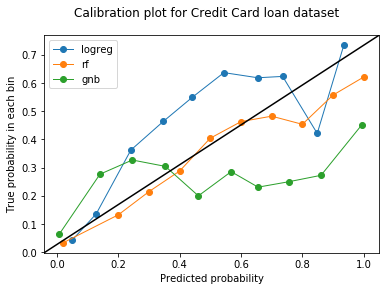

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# calibration curves
fig, ax = plt.subplots()
plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='logreg')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')
plt.plot(gnb_x, gnb_y, marker='o', linewidth=1, label='gnb')


# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Credit Card loan dataset')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()